In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Further Cleanup: job_Skills to list datatype
df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)

# Install and Import Seaborn
import seaborn as sns

# **Copying code from last exercise**

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
              
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
# EXPLODE

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [4]:
df_DA_US_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_grouped.sort_values(by='median', ascending=False).head(10)

In [5]:
df_DA_skills = df_DA_US_grouped.sort_values(by='count', ascending=False).head(10)

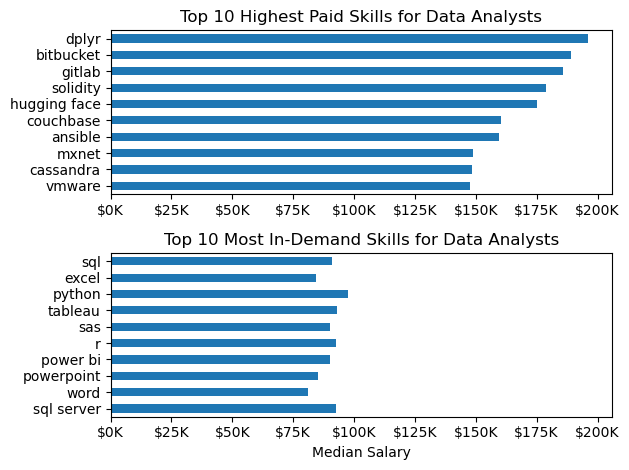

In [7]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
# Standard Customization
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
# Standard Customization
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_xlabel('Median Salary')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Alligning both xlims
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

# **Using Seaborn to generate advanced visuals**

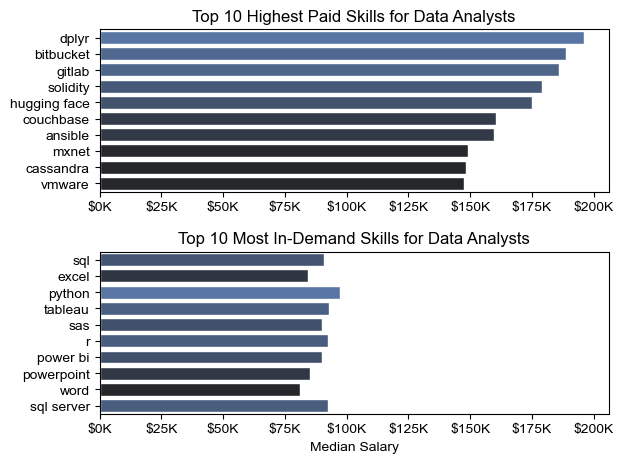

In [19]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')    # Better Coloring

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(
            data=df_DA_top_pay,
            x='median',
            y=df_DA_top_pay.index,
            ax=ax[0],
            hue='median',
            palette='dark:b',
            legend=False)

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)

ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills,
            x='median',
            y=df_DA_skills.index,
            ax=ax[1],
            hue='median',
            palette='dark:b',
            legend=False)

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)

ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_xlabel('Median Salary')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())    # Alligning both xlims by adjusting the 2nd plot to the 1st
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

# **Histogram**

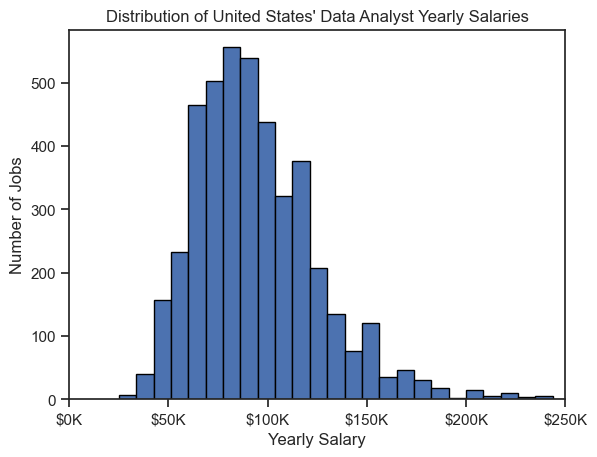

In [20]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(
                                kind='hist',
                                bins=40,
                                edgecolor='black'
)
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title("Distribution of United States' Data Analyst Yearly Salaries")
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

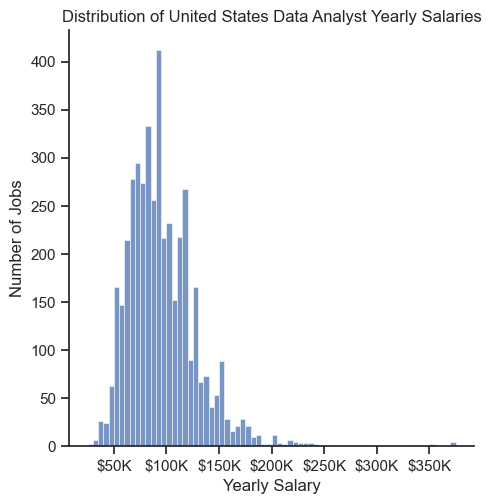

In [21]:
sns.displot(df_DA_US['salary_year_avg'])
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

# For Smoother Distribution

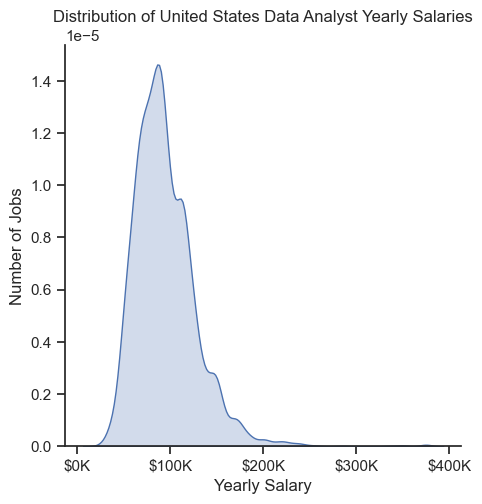

In [23]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

# **Boxplot**

In [25]:
df_US = df[df['job_country'] == 'United States']
"""
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title("Salary Distribution in the United States")
plt.xlabel('Yearly Salary')
plt.xlabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show() """

'\nsns.boxplot(data=df_US, x=\'salary_year_avg\', y=\'job_title_short\')\n\nplt.title("Salary Distribution in the United States")\nplt.xlabel(\'Yearly Salary\')\nplt.xlabel(\'\')\nplt.xlim(0, 600000)\nticks_x = plt.FuncFormatter(lambda y, pos: f\'${int(y/1000)}K\')\nplt.gca().xaxis.set_major_formatter(ticks_x)\nplt.show() '

In [27]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to appropriate job_titles
# Filtering for Only Data Analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

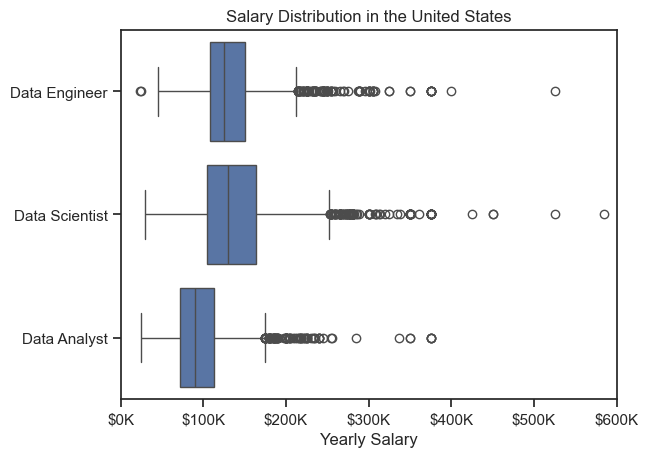

In [29]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title("Salary Distribution in the United States")
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()